# Analiza studiului Data Science

Acest notebook analizează datele colectate în studiul privind starea domeniului Data Science, salvate în fișierul `data/surveyDataScience.csv`.

Se vor calcula informații descriptive (număr de respondenți, atribute, completețe), se vor estima durata studiilor superioare (folosind presupunerile: licență = 3 ani, master = 2 ani, doctorat = 3 ani), se vor filtra și compara subgrupuri (ex. respondenți din România, femei din România care programează în Python sau C++), se va rezuma domeniul de valori pentru fiecare atribut și se va transforma informația despre vechimea în programare pentru a calcula momentele statistice (min, max, medie, deviație standard, mediană).

În plus, se vor realiza vizualizări pentru a evidenția distribuțiile pe categorii de vârstă și identificarea outlierilor pentru vechimea în programare.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Asigurăm afișarea graficelor în notebook
%matplotlib inline

# Încărcăm fișierul CSV
file_path = 'data/surveyDataScience.csv'
df = pd.read_csv(file_path)

print('Primele 5 înregistrări:')
display(df.head())

Primele 5 înregistrări:


/var/folders/kh/6c9k1mvs3x14g59m82lmkd8m0000gn/T/ipykernel_48084/2834738174.py:11: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.a. Analize descriptive

In [30]:
# 1. Numarul total de respondenți
num_respondents = df.shape[0]
print('Numărul total de respondenți:', num_respondents)

# 2. Numărul și tipul atributelor (proprietăților) pentru un respondent
num_attributes = df.shape[1]
print('Numărul de atribute:', num_attributes)

print('\nTipul fiecărui atribut:')
print(df.dtypes)

Numărul total de respondenți: 25974
Numărul de atribute: 369

Tipul fiecărui atribut:
Time from Start to Finish (seconds)    object
Q1                                     object
Q2                                     object
Q3                                     object
Q4                                     object
                                        ...  
Q38_B_Part_8                           object
Q38_B_Part_9                           object
Q38_B_Part_10                          object
Q38_B_Part_11                          object
Q38_B_OTHER                            object
Length: 369, dtype: object


In [31]:
# 3. Numărul de respondenți cu date complete
df_copy = df.dropna()
num_complete = df_copy.shape[0]
print('Numărul de respondenți cu date complete:', num_complete)

Numărul de respondenți cu date complete: 1


### Calcularea duratei medii a studiilor superioare

Se presupune că:
- Studiile de licență durează **3 ani**
- Studiile de master durează **2 ani**
- Studiile de doctorat durează **3 ani**

Se calculează durata medie pentru:
- Respondenții cu date complete
- Respondenții din România
- Respondenții din România care sunt femei

In [32]:
# Numele coloanei de educație (conform header-ului din CSV)
edu_col = "Q4"

# Inspectăm valorile unice din coloana de educație
print("Valori unice în coloana de educație:", df[edu_col].unique())

# Actualizăm mapping-ul pentru durata studiilor, conform valorilor din dataset
edu_mapping = {
    "Bachelor’s degree": 3,  # Studii de licență - 3 ani
    "Master’s degree": 2,  # Studii de master - 2 ani
    "Doctoral degree": 3,  # Studii doctorale - 3 ani
    "Professional doctorate": 3,  # Alternativ pentru doctorat profesional - 3 ani
}

# Facem o copie a setului de date pentru rândurile cu valori non-nule în coloana de educație
df_copy = df[df[edu_col].notna()].copy()

# Înlăturăm eventualele spații suplimentare și mapăm valorile folosind mapping-ul actualizat
df_copy["education_years"] = df_copy[edu_col].str.strip().map(edu_mapping)

# Eliminăm rândurile pentru care mapping-ul nu a avut succes (rămân NaN)
df_copy = df_copy[df_copy["education_years"].notna()]

# 1. Calculăm durata medie pentru toți respondenții cu date complete
mean_all = df_copy["education_years"].mean()
print(
    f"Durata medie a studiilor superioare pentru respondenții cu date complete: {mean_all:.2f} ani"
)

# 2. Respondenții din România
romania_mask = df_copy["Q3"] == "Romania"
df_romania = df_copy[romania_mask]
mean_romania = df_romania["education_years"].mean()
print(
    f"Durata medie a studiilor pentru respondenții din România: {mean_romania:.2f} ani"
)

# 3. Respondenții din România care sunt femei
female_mask = df_copy["Q2"] == "Woman"
df_romania_female = df_romania[female_mask]
mean_romania_female = df_romania_female["education_years"].mean()
print(
    f"Durata medie a studiilor pentru respondenții din România care sunt femei: {mean_romania_female:.2f} ani"
)

# Compararea rezultatelor
print("\nComparație între grupuri:")
if mean_all > mean_romania:
    print(
        f"- Media generală este mai mare decât media din România cu {mean_all - mean_romania:.2f} ani"
    )
elif mean_all < mean_romania:
    print(
        f"- Media din România este mai mare decât media generală cu {mean_romania - mean_all:.2f} ani"
    )
else:
    print("- Media generală este egală cu media din România")

if mean_romania > mean_romania_female:
    print(
        f"- Media din România este mai mare decât media femeilor din România cu {mean_romania - mean_romania_female:.2f} ani"
    )
elif mean_romania < mean_romania_female:
    print(
        f"- Media femeilor din România este mai mare decât media din România cu {mean_romania_female - mean_romania:.2f} ani"
    )
else:
    print("- Media din România este egală cu media femeilor din România")

Valori unice în coloana de educație: ['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
 'Bachelor’s degree' 'Master’s degree' 'Doctoral degree'
 'I prefer not to answer'
 'Some college/university study without earning a bachelor’s degree'
 'No formal education past high school' 'Professional doctorate']
Durata medie a studiilor superioare pentru respondenții cu date complete: 2.56 ani
Durata medie a studiilor pentru respondenții din România: 2.40 ani
Durata medie a studiilor pentru respondenții din România care sunt femei: 2.20 ani

Comparație între grupuri:
- Media generală este mai mare decât media din România cu 0.17 ani
- Media din România este mai mare decât media femeilor din România cu 0.20 ani


/var/folders/kh/6c9k1mvs3x14g59m82lmkd8m0000gn/T/ipykernel_48084/3717700830.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_romania_female = df_romania[female_mask]


In [33]:
# 5. Numărul de respondenți femei din România cu date complete
num_romania_female_complete = df_romania_female.shape[0]
print('Numărul de respondenți femei din România cu date complete:', num_romania_female_complete)

Numărul de respondenți femei din România cu date complete: 15


### Analiza limbajelor de programare pentru femeile din România

Se determină:
- Numărul de femei din România care programează în **Python**
- Intervalul de vârstă (categorie) cu cele mai multe femei care programează în **Python**
- Aceleași informații pentru **C++**

Se presupune că informația despre limbajele folosite este stocată în coloanele:
  - `... - Python`
  - `... - C++`

In [34]:
# Numele coloanelor pentru limbajele Python și C++ (conform header-ului)
python_col = "Q7_Part_1"
cpp_col = "Q7_Part_5"

# Filtrare pentru femeile din România care programează în Python
df_romania_female_python = df_romania_female[df_romania_female[python_col].notna()]
num_romania_female_python = df_romania_female_python.shape[0]
print('Numărul de femei din România care programează în Python:', num_romania_female_python)

# Determinăm intervalul de vârstă cu cele mai multe femei care programează în Python
age_col = "Q1"
age_counts_python = df_romania_female_python[age_col].value_counts()
if not age_counts_python.empty:
    print('Intervalul de vârstă cu cele mai multe femei care programează în Python:',
          age_counts_python.idxmax(), '(', age_counts_python.max(), 'respondente)')
else:
    print('Nu există date pentru femeile care programează în Python.')

# Filtrare pentru femeile din România care programează în C++
df_romania_female_cpp = df_romania_female[df_romania_female[cpp_col].notna()]
num_romania_female_cpp = df_romania_female_cpp.shape[0]
print('Numărul de femei din România care programează în C++:', num_romania_female_cpp)

age_counts_cpp = df_romania_female_cpp[age_col].value_counts()
if not age_counts_cpp.empty:
    print('Intervalul de vârstă cu cele mai multe femei care programează în C++:',
          age_counts_cpp.idxmax(), '(', age_counts_cpp.max(), 'respondente)')
else:
    print('Nu există date pentru femeile care programează în C++.')

Numărul de femei din România care programează în Python: 12
Intervalul de vârstă cu cele mai multe femei care programează în Python: 35-39 ( 5 respondente)
Numărul de femei din România care programează în C++: 4
Intervalul de vârstă cu cele mai multe femei care programează în C++: 18-21 ( 1 respondente)


### Domeniul de valori posibile și valorile extreme pentru fiecare atribut

Pentru fiecare coloană se generează un rezumat: dacă atributul este numeric se vor afișa valorile minime și maxime, iar pentru atributele categorice se va calcula numărul de valori unice (și câteva exemple).

In [35]:
feature_summary = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        summary = {
            'Feature': col,
            'Type': 'Numeric',
            'Min': df[col].min(),
            'Max': df[col].max(),
            'Unique': df[col].nunique()
        }
    else:
        unique_vals = df[col].dropna().unique()
        summary = {
            'Feature': col,
            'Type': 'Categorical',
            'Unique Values Count': len(unique_vals),
            'Example Values': unique_vals[:5]
        }
    feature_summary.append(summary)

summary_df = pd.DataFrame(feature_summary)
print('Primele 10 rezumate de atribute:')
display(summary_df.head(10))

Primele 10 rezumate de atribute:


,Feature,Type,Unique Values Count,Example Values
0,Time from Start to Finish (seconds),Categorical,5410,"[Duration (in seconds), 910, 784, 924, 575]"
1,Q1,Categorical,12,"[What is your age (# years)?, 50-54, 22-24, 45..."
2,Q2,Categorical,6,"[What is your gender? - Selected Choice, Man, ..."
3,Q3,Categorical,67,"[In which country do you currently reside?, In..."
4,Q4,Categorical,8,[What is the highest level of formal education...
5,Q5,Categorical,16,[Select the title most similar to your current...
6,Q6,Categorical,8,[For how many years have you been writing code...
7,Q7_Part_1,Categorical,2,[What programming languages do you use on a re...
8,Q7_Part_2,Categorical,2,[What programming languages do you use on a re...
9,Q7_Part_3,Categorical,2,[What programming languages do you use on a re...


### Transformarea informațiilor despre vechimea în programare

Se transformă informația din coloana "For how many years have you been writing code and/or programming?" într-o valoare numerică, folosind mijlocul intervalului (ex.: "5-10 years" → 7.5). Apoi se calculează momentele de ordin 1 și 2: minim, maxim, medie, deviație standard și mediană.

In [36]:
import pandas as pd
import numpy as np
import re

# Numele coloanei cu informații despre vechimea în programare
exp_col = "Q6"


def experience_to_years(x):
    if pd.isnull(x):
        return np.nan
    # Convertim la string pentru a ne asigura că funcționează re.findall
    x = str(x)
    # Extragem toate numerele din șir
    nums = re.findall(r"\d+", x)
    if len(nums) == 2:
        # Dacă avem două numere, folosim mijlocul intervalului
        return (float(nums[0]) + float(nums[1])) / 2.0
    elif len(nums) == 1:
        # Dacă avem un singur număr, îl folosim direct
        return float(nums[0])
    else:
        return np.nan


# Aplicăm funcția și creăm o nouă coloană pentru vechimea în ani
df["exp_years"] = df[exp_col].apply(experience_to_years)

# Calculăm momentele de ordin 1 și 2
min_exp = df["exp_years"].min()
max_exp = df["exp_years"].max()
mean_exp = df["exp_years"].mean()
std_exp = df["exp_years"].std()
median_exp = df["exp_years"].median()

print("Vechimea în programare (ani):")
print("Minim:", min_exp)
print("Maxim:", max_exp)
print("Media:", mean_exp)
print("Deviație standard:", std_exp)
print("Mediana:", median_exp)

print(
    '\nObservație: Variabila "vechime în programare" prezintă o variabilitate notabilă; valorile extreme pot indica prezența unor outlieri.'
)

Vechimea în programare (ani):
Minim: 1.0
Maxim: 20.0
Media: 5.244597249508841
Deviație standard: 5.741000364362951
Mediana: 2.0

Observație: Variabila "vechime în programare" prezintă o variabilitate notabilă; valorile extreme pot indica prezența unor outlieri.


## 1.b. Vizualizări

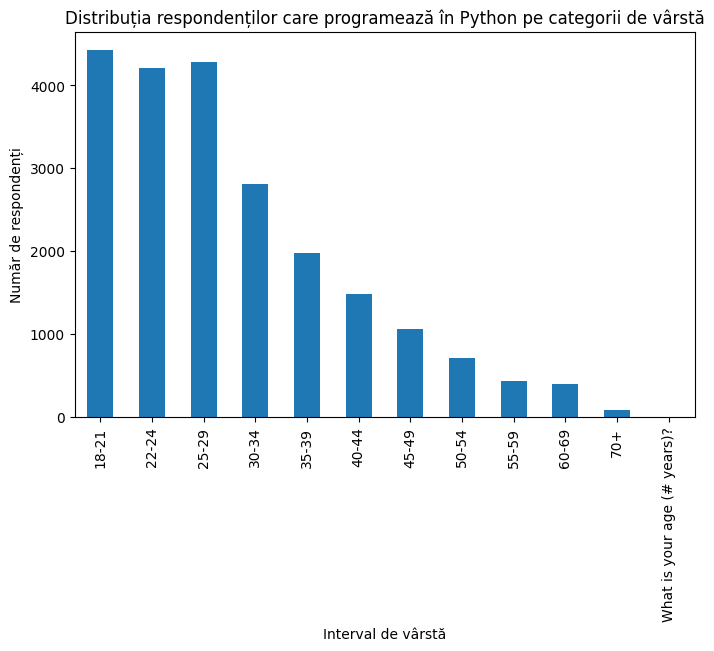

In [37]:
# Vizualizarea distribuției respondenților care programează în Python pe categorii de vârstă
df_python = df[df[python_col].notna()]
age_counts_python_all = df_python[age_col].value_counts().sort_index()

plt.figure(figsize=(8,5))
age_counts_python_all.plot(kind='bar')
plt.title('Distribuția respondenților care programează în Python pe categorii de vârstă')
plt.xlabel('Interval de vârstă')
plt.ylabel('Număr de respondenți')
plt.show()

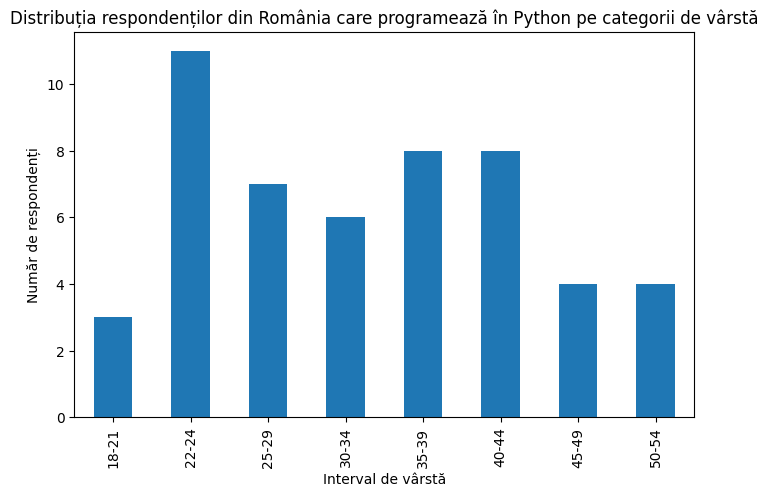

In [38]:
# Vizualizarea distribuției respondenților din România care programează în Python pe categorii de vârstă
df_romania_python = df[df['Q3'] == 'Romania']
df_romania_python = df_romania_python[df_romania_python[python_col].notna()]
age_counts_romania_python = df_romania_python[age_col].value_counts().sort_index()

plt.figure(figsize=(8,5))
age_counts_romania_python.plot(kind='bar')
plt.title('Distribuția respondenților din România care programează în Python pe categorii de vârstă')
plt.xlabel('Interval de vârstă')
plt.ylabel('Număr de respondenți')
plt.show()

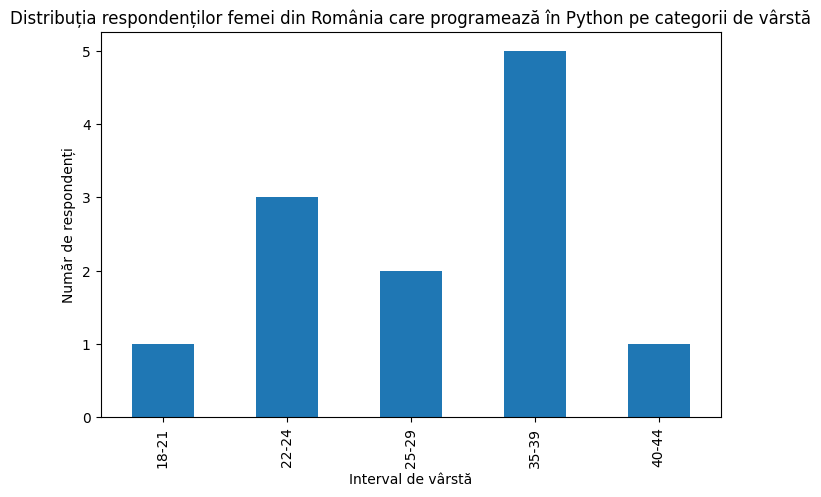

In [39]:
import matplotlib.pyplot as plt

# Define the column names according to your dataset.
# For example, if the column that indicates Python programming is named "Python" and
# the age categories are in the column "Age", then:
python_col = "Q7_Part_1"  # change to your actual column name for Python programming info
age_col = "Q1"  # change to your actual age category column name

# Vizualizarea distribuției respondenților femei din România care programează în Python pe categorii de vârstă
df_romania_female_python_vis = df[
    (df["Q3"] == "Romania") & (df["Q2"] == "Woman") & (df[python_col].notna())
]

age_counts_romania_female_python = (
    df_romania_female_python_vis[age_col].value_counts().sort_index()
)

plt.figure(figsize=(8, 5))
age_counts_romania_female_python.plot(kind="bar")
plt.title(
    "Distribuția respondenților femei din România care programează în Python pe categorii de vârstă"
)
plt.xlabel("Interval de vârstă")
plt.ylabel("Număr de respondenți")
plt.show()

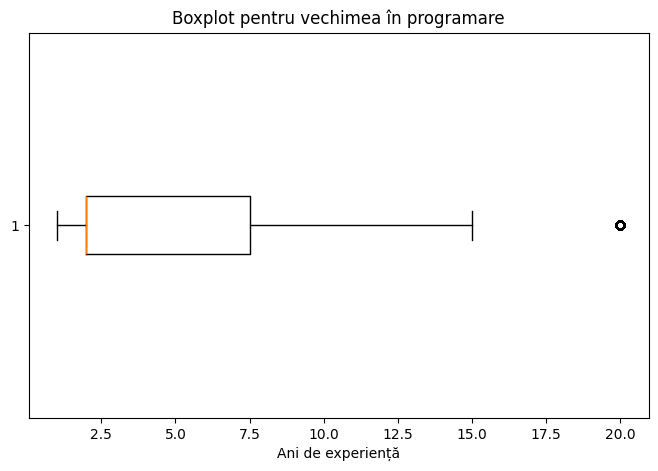

In [40]:
# Boxplot pentru identificarea outlierilor în vechimea în programare
plt.figure(figsize=(8,5))
plt.boxplot(df['exp_years'].dropna(), vert=False)
plt.title('Boxplot pentru vechimea în programare')
plt.xlabel('Ani de experiență')
plt.show()